# STP 429 - Final Lab

## Meshach Samuel

### Importing Libraries

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

### Importing Data

In [89]:
data = pd.read_excel("../Datasets/Fall 2024 Lab #3 Closing Prices.xlsx")
data.head()

,Date,ADP,ALLE,AME,AOS,AXON,BA,BLDR,BR,CARR,...,UAL,UBER,UNP,UPS,URI,VLTO,VRSK,WAB,WM,XYL
0,2023-11-01,210.369995,98.919998,142.399994,70.809998,207.149994,189.380005,117.470001,170.529999,49.660000,...,34.810001,43.830002,207.559998,139.800003,409.480011,67.510002,222.250000,105.800003,164.039993,94.480003
1,2023-11-02,218.559998,99.129997,143.699997,71.349998,210.270004,192.009995,121.250000,178.809998,49.970001,...,35.820000,46.480000,211.389999,141.990005,432.950012,70.279999,229.869995,109.349998,166.850006,94.309998
2,2023-11-03,219.309998,101.889999,143.699997,71.559998,217.250000,195.050003,126.790001,177.119995,50.529999,...,37.509998,47.750000,212.130005,142.860001,451.510010,70.800003,230.619995,111.290001,168.119995,96.930000
3,2023-11-06,220.539993,101.730003,143.460007,71.089996,216.860001,192.949997,125.589996,177.330002,50.270000,...,36.759998,48.139999,213.100006,142.270004,438.540009,68.260002,230.809998,110.269997,169.220001,96.160004
4,2023-11-07,222.250000,101.410004,146.500000,70.650002,216.369995,191.410004,126.059998,176.899994,50.450001,...,37.029999,49.919998,211.410004,141.850006,440.359985,70.070000,233.190002,109.800003,169.360001,96.769997


### Data Pre-Processing

#### Removing Unnecessary Columns

In [90]:
data = data.drop(["Date"], axis=1)
data.head()

,ADP,ALLE,AME,AOS,AXON,BA,BLDR,BR,CARR,CAT,...,UAL,UBER,UNP,UPS,URI,VLTO,VRSK,WAB,WM,XYL
0,210.369995,98.919998,142.399994,70.809998,207.149994,189.380005,117.470001,170.529999,49.660000,231.830002,...,34.810001,43.830002,207.559998,139.800003,409.480011,67.510002,222.250000,105.800003,164.039993,94.480003
1,218.559998,99.129997,143.699997,71.349998,210.270004,192.009995,121.250000,178.809998,49.970001,239.119995,...,35.820000,46.480000,211.389999,141.990005,432.950012,70.279999,229.869995,109.349998,166.850006,94.309998
2,219.309998,101.889999,143.699997,71.559998,217.250000,195.050003,126.790001,177.119995,50.529999,240.750000,...,37.509998,47.750000,212.130005,142.860001,451.510010,70.800003,230.619995,111.290001,168.119995,96.930000
3,220.539993,101.730003,143.460007,71.089996,216.860001,192.949997,125.589996,177.330002,50.270000,238.279999,...,36.759998,48.139999,213.100006,142.270004,438.540009,68.260002,230.809998,110.269997,169.220001,96.160004
4,222.250000,101.410004,146.500000,70.650002,216.369995,191.410004,126.059998,176.899994,50.450001,234.919998,...,37.029999,49.919998,211.410004,141.850006,440.359985,70.070000,233.190002,109.800003,169.360001,96.769997


### EDA

#### Declaring Variables

In [91]:
y = data["DAL"]
x = data.drop(["DAL"], axis=1)

#### Multicollinearity Analysis

In [92]:
VIF = pd.DataFrame()
x = sm.add_constant(x)
VIF["Stocks"] = x.columns
VIF["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
VIF = VIF.drop(0)

VIF

,Stocks,VIF
1,ADP,196.795127
2,ALLE,126.455297
3,AME,49.341690
4,AOS,28.644342
5,AXON,155.879992
...,...,...
71,VLTO,230.344146
72,VRSK,69.152626
73,WAB,392.053321
74,WM,262.921445


In [93]:
vif_threshold = 10

x = sm.add_constant(x)

while True:
    VIF = pd.DataFrame()
    VIF["Stocks"] = x.columns
    VIF["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    VIF = VIF.drop(0)

    if VIF["VIF"].max() > vif_threshold:
        data = data.drop(VIF[VIF["VIF"] == VIF["VIF"].max()]["Stocks"].values, axis=1)
        x = x.drop(VIF[VIF["VIF"] == VIF["VIF"].max()]["Stocks"].values, axis=1)
    else:
        break

In [94]:
VIF

,Stocks,VIF
1,AOS,4.803780
2,BA,6.493495
3,CPRT,4.140213
4,DAY,7.315366
5,DE,3.524842
6,EXPD,3.672047
7,FDX,3.262545
8,GNRC,7.489215
9,HII,6.285377
10,HON,5.650714


In [96]:
data.head()

,AOS,BA,CPRT,DAL,DAY,DE,EXPD,FDX,GNRC,HII,HON,LUV,NOC,ODFL,ROK,SNA,UAL,UNP,VRSK
0,70.809998,189.380005,43.820000,31.110001,61.689999,370.470001,109.919998,243.229996,96.129997,220.990005,183.990005,22.230000,468.260010,195.324997,266.980011,260.519989,34.810001,207.559998,222.250000
1,71.349998,192.009995,45.250000,32.020000,67.080002,373.559998,112.809998,247.250000,99.360001,233.850006,186.429993,23.160000,475.769989,194.414993,258.600006,263.369995,35.820000,211.389999,229.869995
2,71.559998,195.050003,45.930000,33.349998,65.199997,382.200012,112.949997,247.139999,104.919998,233.960007,188.990005,23.700001,470.579987,196.169998,263.700012,270.859985,37.509998,212.130005,230.619995
3,71.089996,192.949997,45.910000,32.919998,65.360001,378.250000,111.489998,245.330002,102.470001,234.550003,187.500000,23.530001,471.000000,197.020004,258.500000,268.959991,36.759998,213.100006,230.809998
4,70.650002,191.410004,46.529999,33.439999,66.050003,369.239990,110.400002,244.199997,103.790001,232.240005,186.610001,23.559999,467.700012,198.179993,257.019989,267.070007,37.029999,211.410004,233.190002


#### Re-Declaring Variables

In [97]:
x = data.drop(["DAL"], axis=1)
x

,AOS,BA,CPRT,DAY,DE,EXPD,FDX,GNRC,HII,HON,LUV,NOC,ODFL,ROK,SNA,UAL,UNP,VRSK
0,70.809998,189.380005,43.820000,61.689999,370.470001,109.919998,243.229996,96.129997,220.990005,183.990005,22.230000,468.260010,195.324997,266.980011,260.519989,34.810001,207.559998,222.250000
1,71.349998,192.009995,45.250000,67.080002,373.559998,112.809998,247.250000,99.360001,233.850006,186.429993,23.160000,475.769989,194.414993,258.600006,263.369995,35.820000,211.389999,229.869995
2,71.559998,195.050003,45.930000,65.199997,382.200012,112.949997,247.139999,104.919998,233.960007,188.990005,23.700001,470.579987,196.169998,263.700012,270.859985,37.509998,212.130005,230.619995
3,71.089996,192.949997,45.910000,65.360001,378.250000,111.489998,245.330002,102.470001,234.550003,187.500000,23.530001,471.000000,197.020004,258.500000,268.959991,36.759998,213.100006,230.809998
4,70.650002,191.410004,46.529999,66.050003,369.239990,110.400002,244.199997,103.790001,232.240005,186.610001,23.559999,467.700012,198.179993,257.019989,267.070007,37.029999,211.410004,233.190002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,76.870003,155.009995,51.709999,64.839996,407.929993,119.839996,272.119995,164.399994,253.830002,208.000000,29.430000,519.349976,197.789993,269.859985,326.579987,74.639999,230.300003,264.649994
248,77.000000,150.690002,51.849998,65.110001,412.350006,120.080002,275.450012,165.649994,255.160004,206.100006,30.299999,512.150024,200.880005,271.329987,332.589996,76.089996,231.979996,262.859985
249,76.349998,152.979996,52.180000,65.320000,406.040009,119.620003,275.040009,165.600006,253.759995,205.979996,31.030001,504.049988,201.309998,268.429993,333.480011,76.930000,231.990005,263.649994
250,75.910004,154.289993,52.299999,70.080002,404.690002,119.550003,274.079987,165.149994,250.490005,204.199997,31.469999,505.339996,203.820007,266.630005,333.049988,80.419998,232.169998,275.630005


#### Graphing

DAL vs AOS

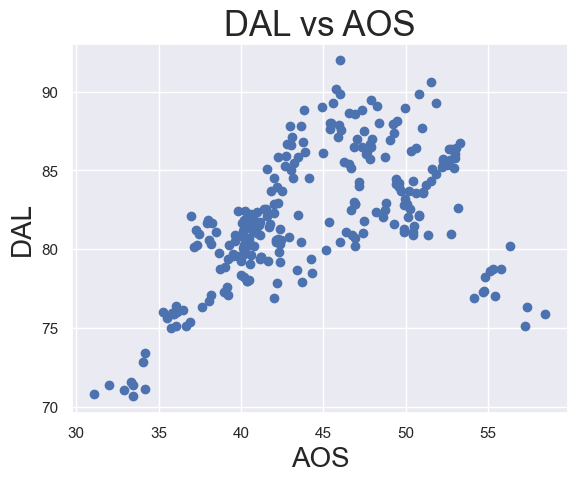

In [101]:
plt.scatter(data["DAL"], data["AOS"])
plt.title("DAL vs AOS", fontsize = 25)
plt.ylabel("DAL", fontsize = 20)
plt.xlabel("AOS", fontsize = 20)

plt.show()

DAL vs BA

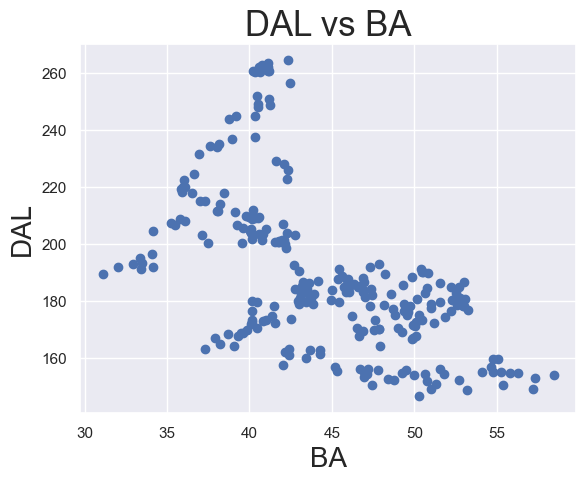

In [102]:
plt.scatter(data["DAL"], data["BA"])
plt.title("DAL vs BA", fontsize = 25)
plt.ylabel("DAL", fontsize = 20)
plt.xlabel("BA", fontsize = 20)

plt.show()

DAL vs CPRT

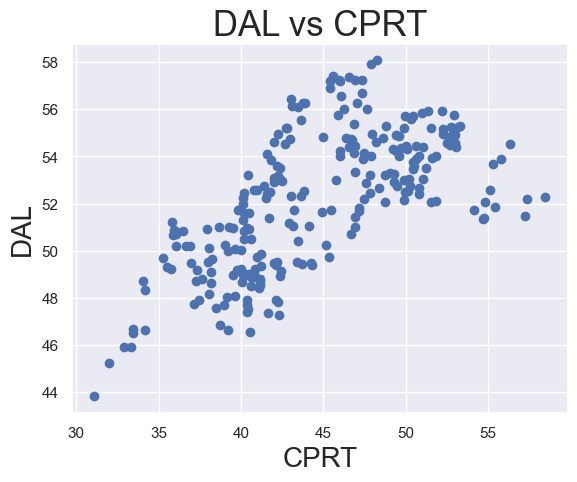

In [103]:
plt.scatter(data["DAL"], data["CPRT"])
plt.title("DAL vs CPRT", fontsize = 25)
plt.ylabel("DAL", fontsize = 20)
plt.xlabel("CPRT", fontsize = 20)

plt.show()

DAL vs Day

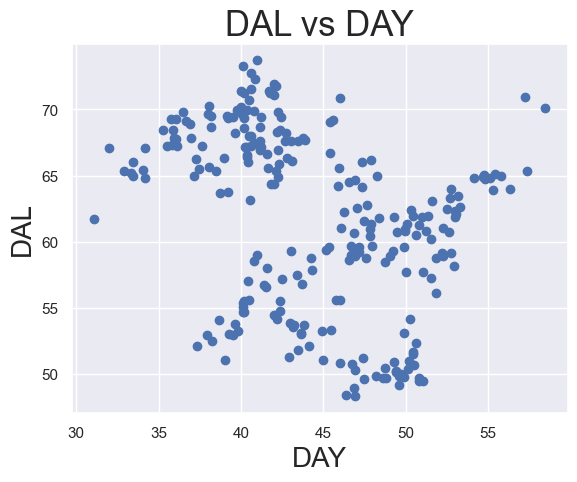

In [104]:
plt.scatter(data["DAL"], data["DAY"])
plt.title("DAL vs DAY", fontsize = 25)
plt.ylabel("DAL", fontsize = 20)
plt.xlabel("DAY", fontsize = 20)

plt.show()

DAL vs DE

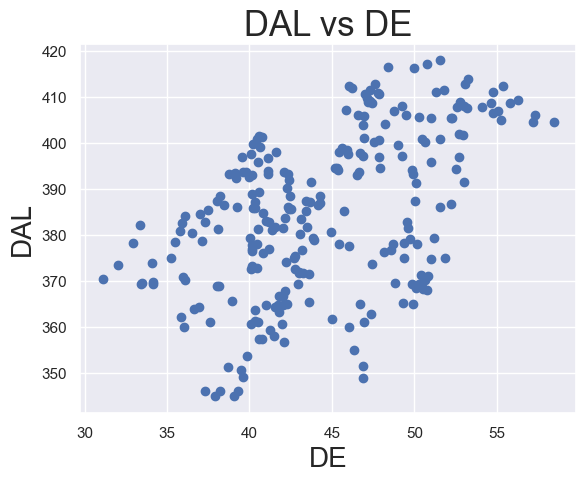

In [105]:
plt.scatter(data["DAL"], data["DE"])
plt.title("DAL vs DE", fontsize = 25)
plt.ylabel("DAL", fontsize = 20)
plt.xlabel("DE", fontsize = 20)

plt.show()

DAL vs EXPD

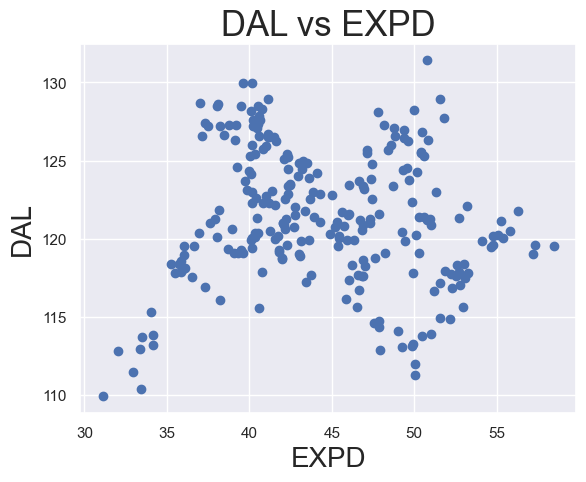

In [106]:
plt.scatter(data["DAL"], data["EXPD"])
plt.title("DAL vs EXPD", fontsize = 25)
plt.ylabel("DAL", fontsize = 20)
plt.xlabel("EXPD", fontsize = 20)

plt.show()

DAL vs FDX

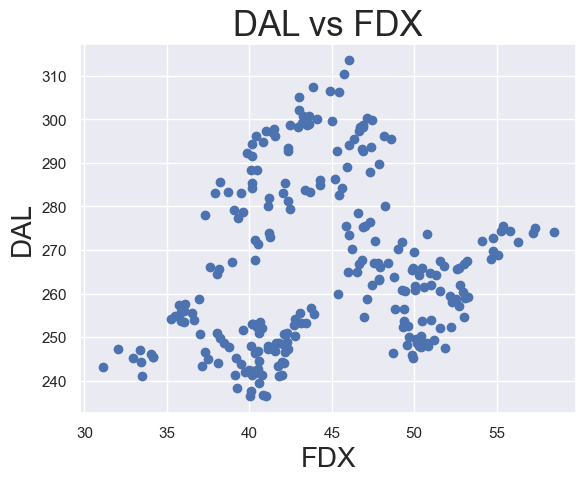

In [107]:
plt.scatter(data["DAL"], data["FDX"])
plt.title("DAL vs FDX", fontsize = 25)
plt.ylabel("DAL", fontsize = 20)
plt.xlabel("FDX", fontsize = 20)

plt.show()

DAL vs GNRC

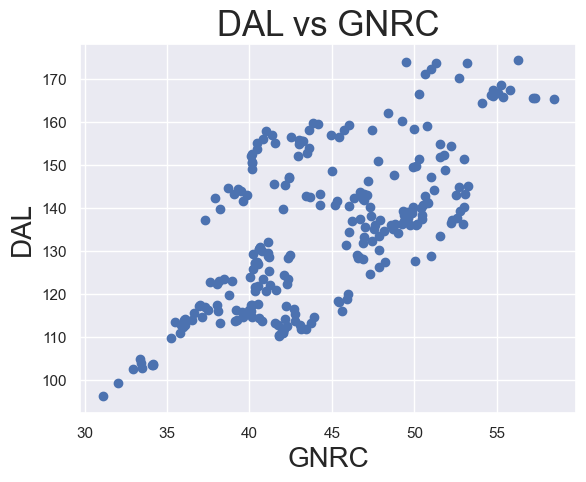

In [108]:
plt.scatter(data["DAL"], data["GNRC"])
plt.title("DAL vs GNRC", fontsize = 25)
plt.ylabel("DAL", fontsize = 20)
plt.xlabel("GNRC", fontsize = 20)

plt.show()

DAL vs HII

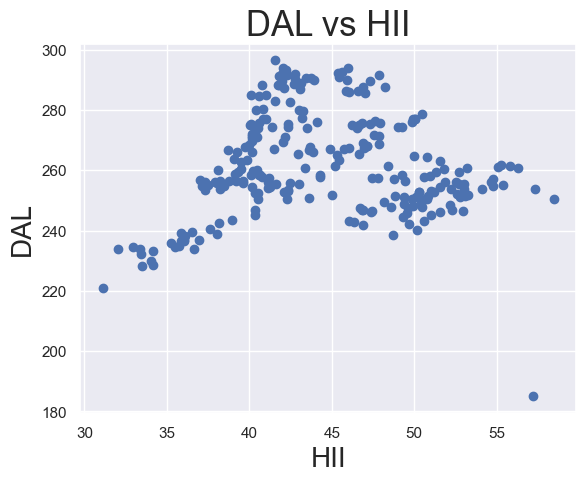

In [109]:
plt.scatter(data["DAL"], data["HII"])
plt.title("DAL vs HII", fontsize = 25)
plt.ylabel("DAL", fontsize = 20)
plt.xlabel("HII", fontsize = 20)

plt.show()

DAL vs HON

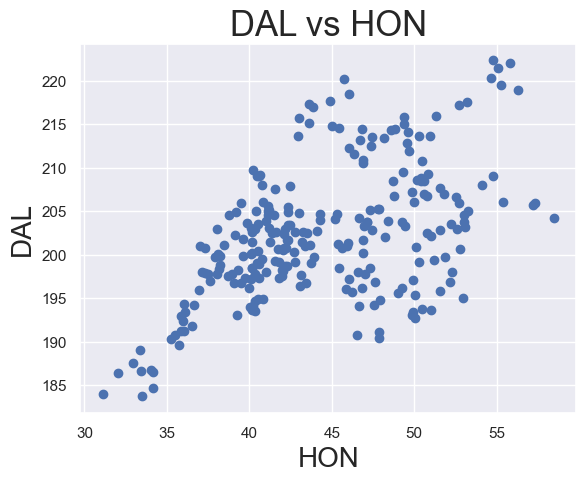

In [110]:
plt.scatter(data["DAL"], data["HON"])
plt.title("DAL vs HON", fontsize = 25)
plt.ylabel("DAL", fontsize = 20)
plt.xlabel("HON", fontsize = 20)

plt.show()

DAL vs LUV

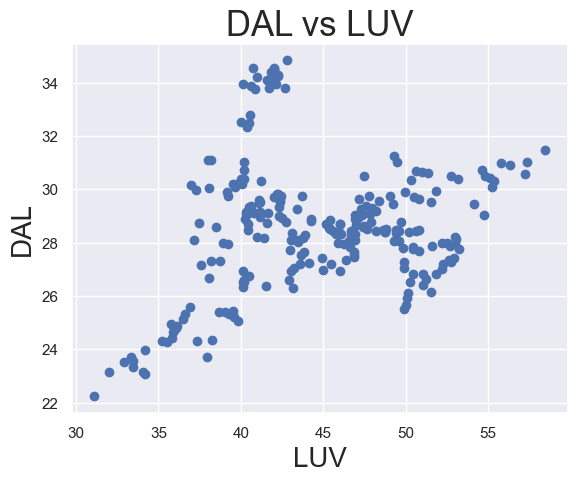

In [111]:
plt.scatter(data["DAL"], data["LUV"])
plt.title("DAL vs LUV", fontsize = 25)
plt.ylabel("DAL", fontsize = 20)
plt.xlabel("LUV", fontsize = 20)

plt.show()

DAL vs NOC

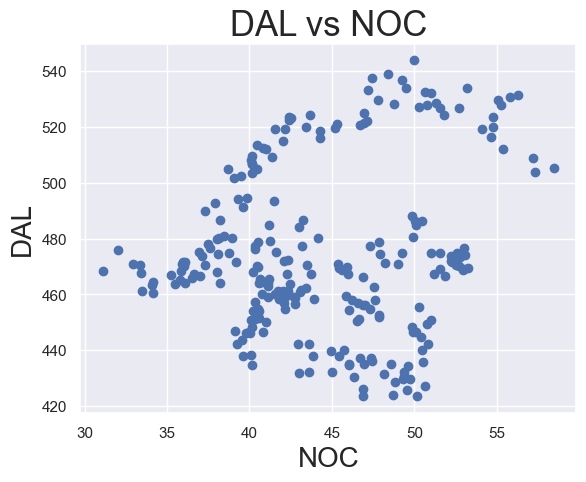

In [113]:
plt.scatter(data["DAL"], data["NOC"])
plt.title("DAL vs NOC", fontsize = 25)
plt.ylabel("DAL", fontsize = 20)
plt.xlabel("NOC", fontsize = 20)

plt.show()

DAL vs ODFL

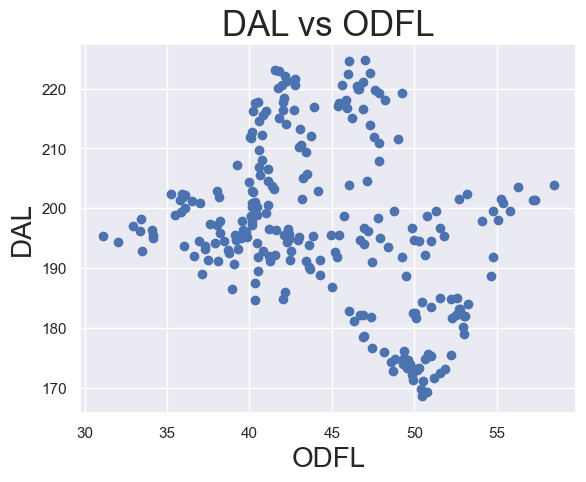

In [114]:
plt.scatter(data["DAL"], data["ODFL"])
plt.title("DAL vs ODFL", fontsize = 25)
plt.ylabel("DAL", fontsize = 20)
plt.xlabel("ODFL", fontsize = 20)

plt.show()

DAL vs ROK

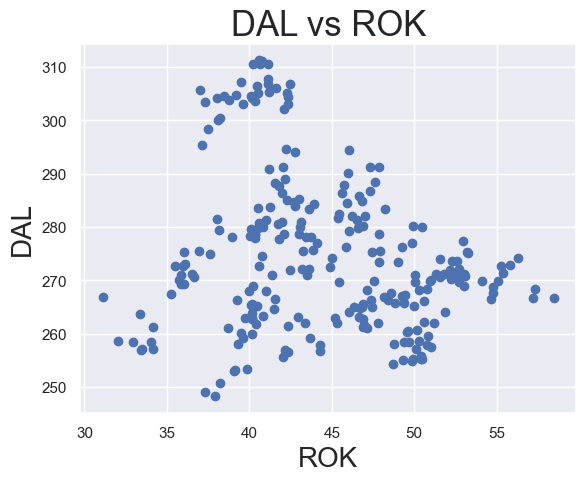

In [115]:
plt.scatter(data["DAL"], data["ROK"])
plt.title("DAL vs ROK", fontsize = 25)
plt.ylabel("DAL", fontsize = 20)
plt.xlabel("ROK", fontsize = 20)

plt.show()

DAL vs SNA

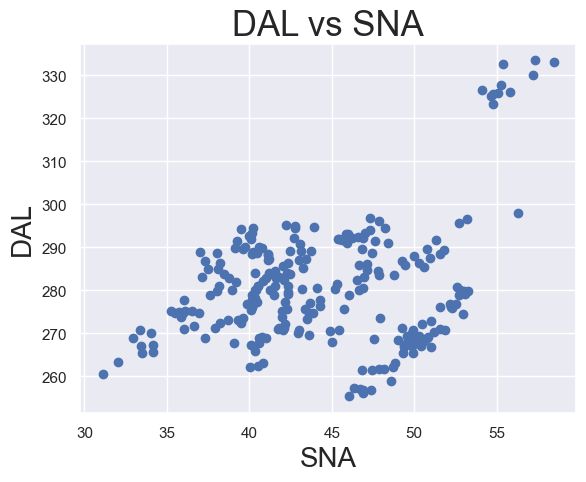

In [117]:
plt.scatter(data["DAL"], data["SNA"])
plt.title("DAL vs SNA", fontsize = 25)
plt.ylabel("DAL", fontsize = 20)
plt.xlabel("SNA", fontsize = 20)

plt.show()

DAL vs UAL

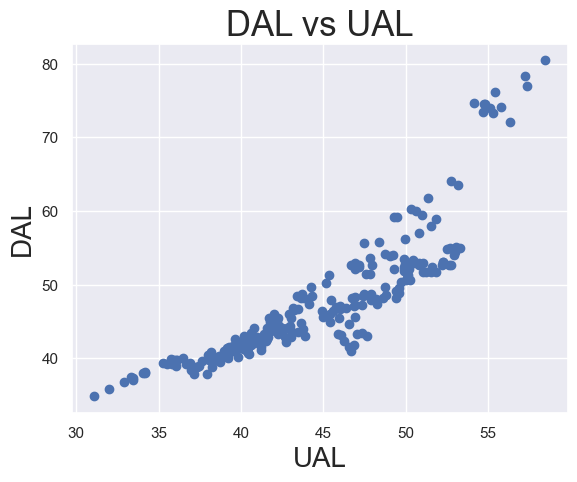

In [118]:
plt.scatter(data["DAL"], data["UAL"])
plt.title("DAL vs UAL", fontsize = 25)
plt.ylabel("DAL", fontsize = 20)
plt.xlabel("UAL", fontsize = 20)

plt.show()

DAL vs UNP

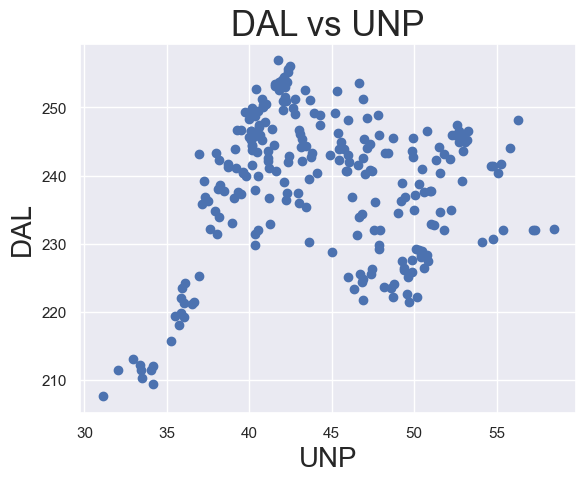

In [119]:
plt.scatter(data["DAL"], data["UNP"])
plt.title("DAL vs UNP", fontsize = 25)
plt.ylabel("DAL", fontsize = 20)
plt.xlabel("UNP", fontsize = 20)

plt.show()

DAL vs VRSK

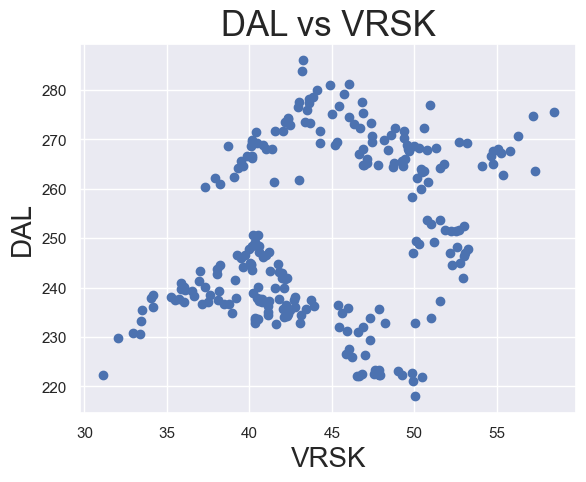

In [121]:
plt.scatter(data["DAL"], data["VRSK"])
plt.title("DAL vs VRSK", fontsize = 25)
plt.ylabel("DAL", fontsize = 20)
plt.xlabel("VRSK", fontsize = 20)

plt.show()

### Linear Regression Model

#### Standardizing Variables

In [123]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [125]:
scaled_x = scaler.transform(x)
scaled_x

array([[-2.70490965,  0.00873428, -2.86549552, ..., -1.49025133,
        -2.95912443, -1.69425585],
       [-2.57509782,  0.10411409, -2.36842231, ..., -1.37068257,
        -2.59330548, -1.24741022],
       [-2.52461544,  0.21436369, -2.13205183, ..., -1.1706121 ,
        -2.5226245 , -1.20342932],
       ...,
       [-1.37313642, -1.31135654,  0.04047097, ...,  3.49612614,
        -0.62571522,  0.73348939],
       [-1.47890758, -1.2638479 ,  0.08218306, ...,  3.90928966,
        -0.60852336,  1.43601158],
       [-1.67362677, -1.44445351, -0.20632727, ...,  3.65357847,
        -0.61807391,  1.38264786]])

#### Train and Test

In [127]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=42)

#### Creating Model

In [128]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [129]:
yhat = reg.predict(x_train)

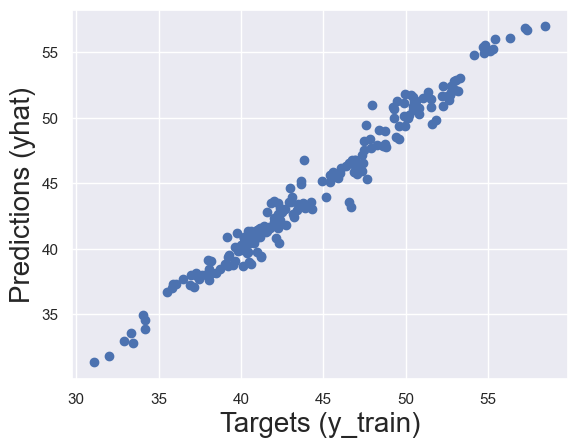

In [130]:
plt.scatter(y_train, yhat)
plt.xlabel("Targets (y_train)", size=20)
plt.ylabel("Predictions (yhat)", size=20)

plt.show()

C:\Users\mesha\AppData\Local\Temp\ipykernel_65400\3808539106.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - yhat)


Text(0.5, 1.0, 'Residuals PDF')

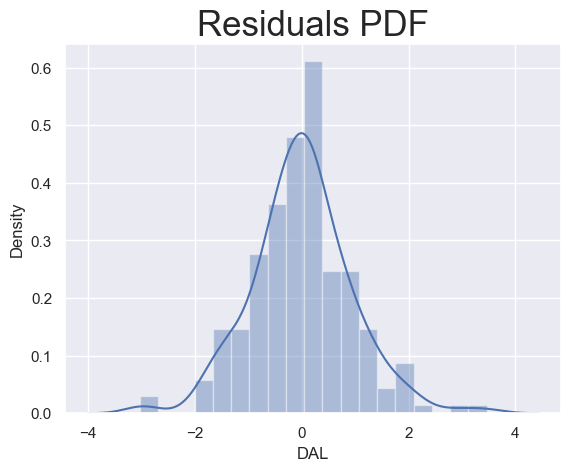

In [168]:
sns.distplot(y_train - yhat)
plt.title("Residuals PDF", size=25)

#### Summary Table

In [160]:
summary = pd.DataFrame(data = x.columns.values, columns=["Features"])
summary["Weights"] = reg.coef_
summary.loc[-1] = ['Intercept', reg.intercept_]
summary.index = summary.index + 1
summary = summary.sort_index()
summary

,Features,Weights
0,Intercept,44.468167
1,AOS,0.693559
2,BA,0.541748
3,CPRT,1.298872
4,DAY,-0.892282
5,DE,0.489629
6,EXPD,0.186759
7,FDX,0.164990
8,GNRC,0.560646
9,HII,-0.459532


In [167]:
reg.score(x_train, y_train)

0.9734638029726085